In [1]:
import pandas as pd
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
print(df['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [16]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [25]:
df['CustomerID'].value_counts

<bound method IndexOpsMixin.value_counts of 0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 406829, dtype: float64>

In [26]:
#Sales Analysis

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#let's create a new column for total sales
df['Total_sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
sales_per_day = df.groupby(df['InvoiceDate'])['Total_sales'].sum()
sales_per_day

InvoiceDate
2010-12-01 08:26:00    139.12
2010-12-01 08:28:00     22.20
2010-12-01 08:34:00    348.78
2010-12-01 08:35:00     17.85
2010-12-01 08:45:00    855.86
                        ...  
2011-12-09 12:23:00    124.60
2011-12-09 12:25:00    140.64
2011-12-09 12:31:00    329.05
2011-12-09 12:49:00    339.20
2011-12-09 12:50:00    249.45
Name: Total_sales, Length: 20460, dtype: float64

In [29]:
sales_per_day = df.groupby(df['InvoiceDate'].dt.date)['Total_sales'].sum()
sales_per_day

InvoiceDate
2010-12-01    46051.26
2010-12-02    45775.43
2010-12-03    22598.46
2010-12-05    31380.60
2010-12-06    30465.08
                ...   
2011-12-05    56634.53
2011-12-06    43659.20
2011-12-07    68991.27
2011-12-08    49442.19
2011-12-09    15560.21
Name: Total_sales, Length: 305, dtype: float64

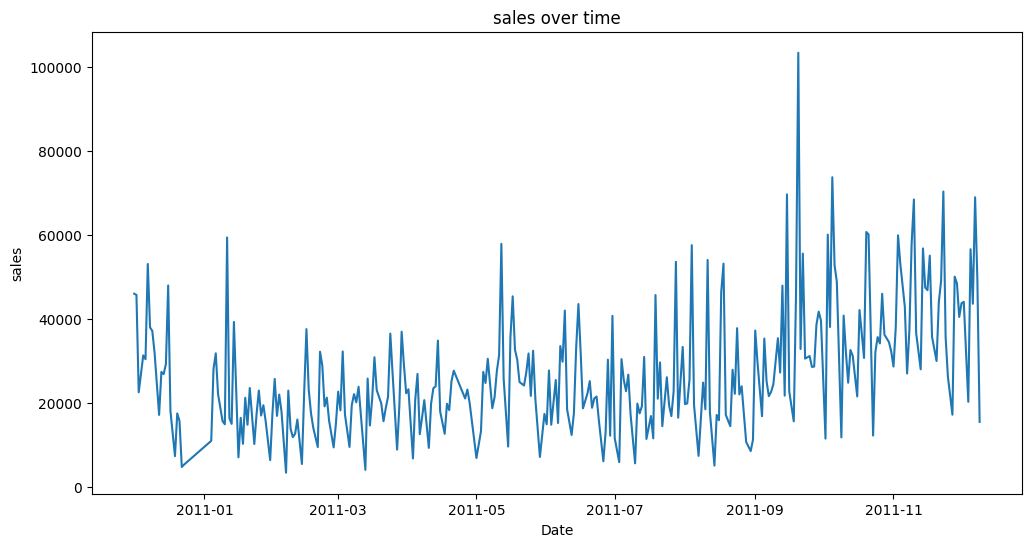

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize =(12,6))
sales_per_day.plot()
plt.title('sales over time')
plt.xlabel('Date')
plt.ylabel('sales')
plt.show()

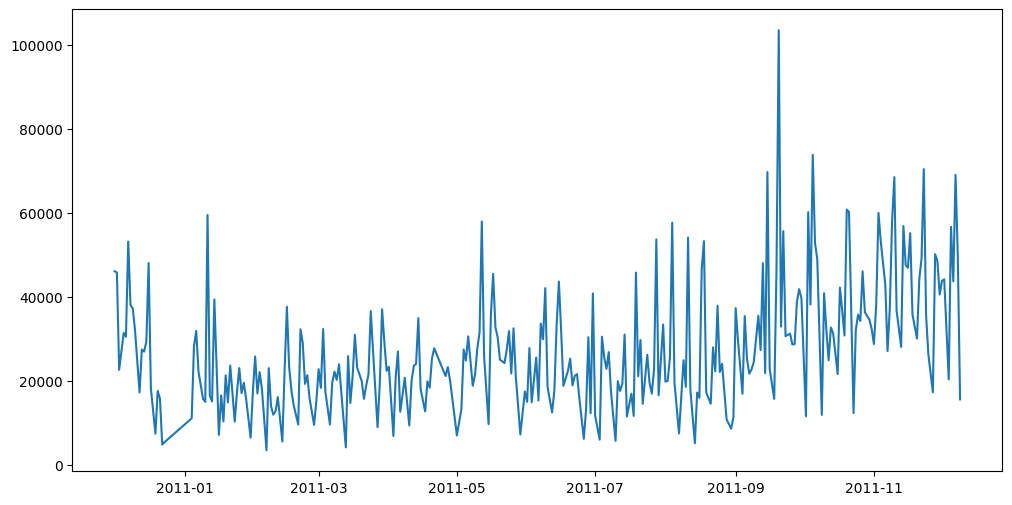

In [31]:
plt.figure(figsize =(12,6))
plt.plot(sales_per_day)
plt.show()

In [33]:
#sales by country
sales_by_country = df.groupby(df['Country'])['Total_sales'].sum()
sales_by_country

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     250285.220
European Community         1291.750
Finland                   22326.740
France                   196712.840
Germany                  221698.210
Greece                     4710.520
Iceland                    4310.000
Israel                     6994.250
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal                  29059.810
RSA                 

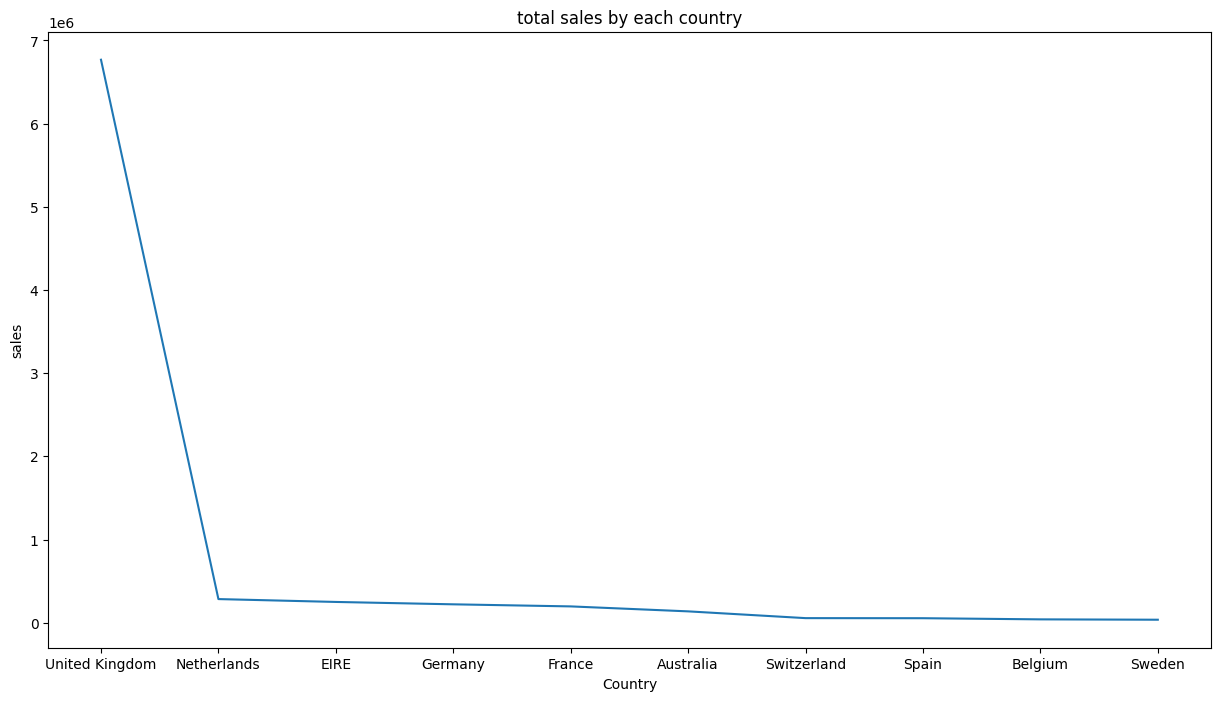

In [39]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.lineplot(sales_by_country.sort_values(ascending =False).head(10))
plt.xlabel('Country')
plt.ylabel('sales')
plt.title('total sales by each country')
plt.show()

In [43]:
#Top 10 countries by sales
sales_by_country = sales_by_country.sort_values(ascending =False)
sales_by_country.head(10)

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Total_sales, dtype: float64

In [45]:
pip install mplcursors


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
sales_by_country = sales_by_country.reset_index()
Top10_sales = sales_by_country.head(10)

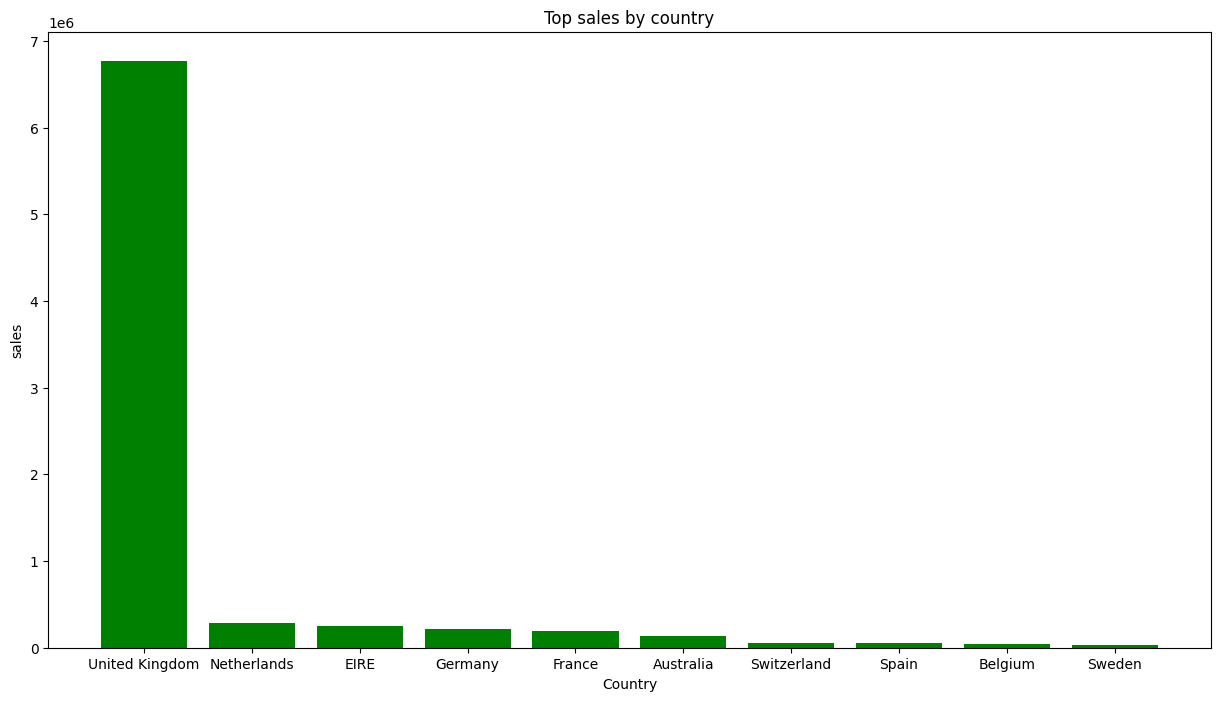

In [68]:
import mplcursors
plt.figure(figsize=(15,8))
plt.bar(Top10_sales['Country'],Top10_sales['Total_sales'],color = 'green')
mplcursors.cursor(hover=True)
plt.title('Top sales by country')
plt.xlabel('Country')
plt.ylabel('sales')
plt.show()

In [73]:
#Top products by sales

top_products = df.groupby(df['Description'])['Total_sales'].sum().sort_values(ascending =False)
top_products.head(10)

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: Total_sales, dtype: float64

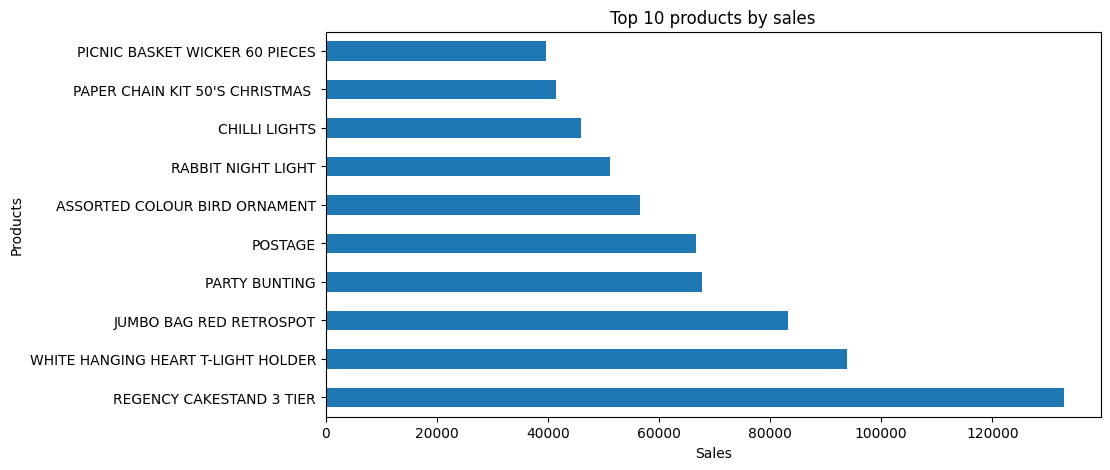

In [75]:
top_products.head(10).plot(kind = 'barh', figsize=(10,5))
mplcursors.cursor(hover=True)
plt.title("Top 10 products by sales")
plt.xlabel('Sales')
plt.ylabel('Products')
plt.show()

In [76]:
# Customer Analysis - repeat vs new customers

# first purchase of each customer
first_purchase = df.groupby(df['CustomerID'])['InvoiceDate'].min()
first_purchase

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2010-12-07 14:57:00
12348.0   2010-12-16 19:09:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
                  ...        
18280.0   2011-03-07 09:52:00
18281.0   2011-06-12 10:53:00
18282.0   2011-08-05 13:35:00
18283.0   2011-01-06 14:14:00
18287.0   2011-05-22 10:39:00
Name: InvoiceDate, Length: 4372, dtype: datetime64[ns]

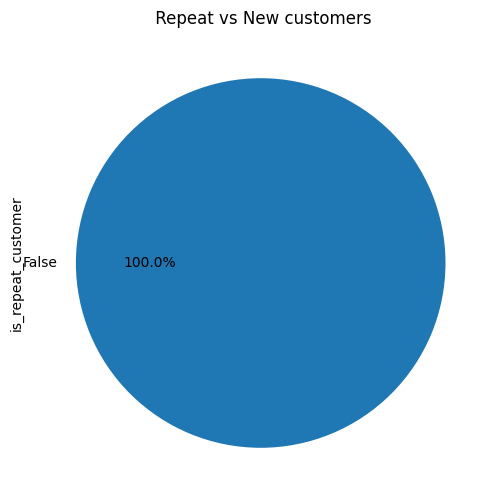

In [78]:
# check whether the customer is repeat customer or not

df['is_repeat_customer'] = df['CustomerID'].apply(lambda x: df[df['CustomerID']==x]['InvoiceDate'].min() != first_purchase[x])

repeat_customer_count = df['is_repeat_customer'].value_counts()

repeat_customer_count.plot(kind ='pie', autopct = '%1.1f%%', figsize=(6,6),title = ' Repeat vs New customers')
plt.show()

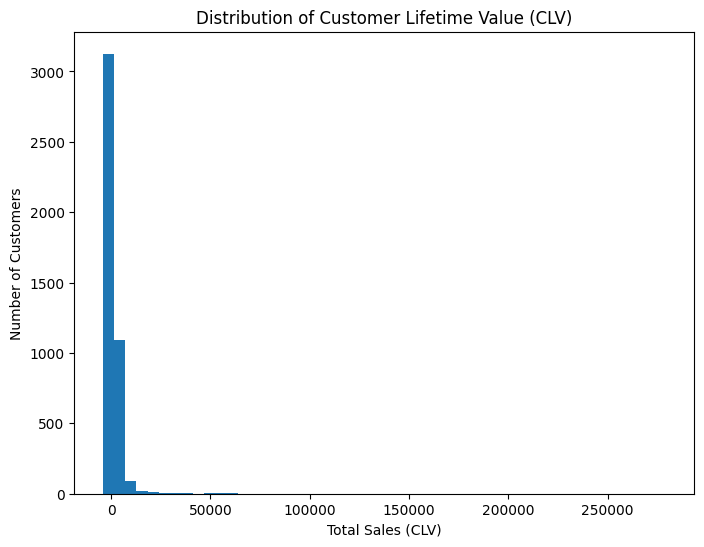

In [83]:
# Customer lifetime value

clv = df.groupby(df['CustomerID'])['Total_sales'].sum()
clv.plot(kind ='hist', bins =50, figsize =(8,6))
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('Total Sales (CLV)')
plt.ylabel('Number of Customers')
plt.show()

In [85]:
clv.sort_values(ascending = False)

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
             ...    
12503.0     -1126.00
17603.0     -1165.30
14213.0     -1192.20
15369.0     -1592.49
17448.0     -4287.63
Name: Total_sales, Length: 4372, dtype: float64

In [86]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales,is_repeat_customer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False


In [88]:
#let's build recommendation system using colloborative filtering
# usng matrix factorization SVD

from sklearn.decomposition import TruncatedSVD
import numpy as np

#create a user-product matrix
user_product_matrix = df.pivot_table(index='CustomerID', columns = 'StockCode',values = 'Quantity', aggfunc ='sum',fill_value=0)



In [89]:
user_product_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
user_product_matrix.columns = user_product_matrix.columns.astype(str)
# Perform Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=20, random_state=42)
user_factors = svd.fit_transform(user_product_matrix)
item_factors = svd.components_

# Recommend products for a user
def recommend_products(user_id, n=5):
    user_idx = user_product_matrix.index.get_loc(user_id)
    user_ratings = user_factors[user_idx]
    top_n_idx = user_ratings.argsort()[-n:][::-1]
    recommended_products = user_product_matrix.columns[top_n_idx]
    return recommended_products


In [103]:
# example - product recommendations for customer with ID 12347
recommended = recommend_products(12347)
print("Recommended Products:", recommended.tolist())

Recommended Products: ['10002', '16010', '16011', '15036', '15034']


In [107]:
# Create a mapping of StockCode to Description
stockcode_to_description = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()
recommended_products = [stockcode_to_description.get(stockcode, "Unknown Product") for stockcode in recommended]

print("Recommended Products:", recommended_products)

Recommended Products: ['Unknown Product', 'Unknown Product', 'Unknown Product', 'Unknown Product', 'Unknown Product']


In [106]:
#product_details = df.set_index('StockCode').loc[recommended]
#print("Recommended Product Details:")
#print(product_details)
#recommended = recommended.tolist()
recommended_details = df[df['StockCode'].isin(recommended)]

# Display the result
print("Recommended Product Details:")
print(recommended_details[['StockCode', 'Description']])

Recommended Product Details:
Empty DataFrame
Columns: [StockCode, Description]
Index: []


In [126]:
#sales forecasting
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [110]:
# Aggregate total sales by date
df['Date'] = df['InvoiceDate'].dt.date
sales_data = df.groupby('Date')['Total_sales'].sum().reset_index()

In [118]:
# Normalize the sales data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(sales_data[['Total_sales']])

In [123]:
# Create sequences for LSTM model
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(x), np.array(y)

sequence_length=30
x, y = create_sequences(scaled_sales, sequence_length)

In [124]:
# Train-test split
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [127]:
# Build the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, x.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [128]:
# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0383 - val_loss: 0.0210
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0174 - val_loss: 0.0291
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0143 - val_loss: 0.0336
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0176 - val_loss: 0.0214
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0154 - val_loss: 0.0238
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0170 - val_loss: 0.0255
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0177 - val_loss: 0.0229
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0137 - val_loss: 0.0228
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0143 - val_loss: 0.0224
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0146 - val_loss: 0.0213
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0143 - val_loss: 0.0213
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0180 - val_loss: 0.0205
E

In [129]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step


In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 11237.386710227272
RMSE: 14452.169500640055


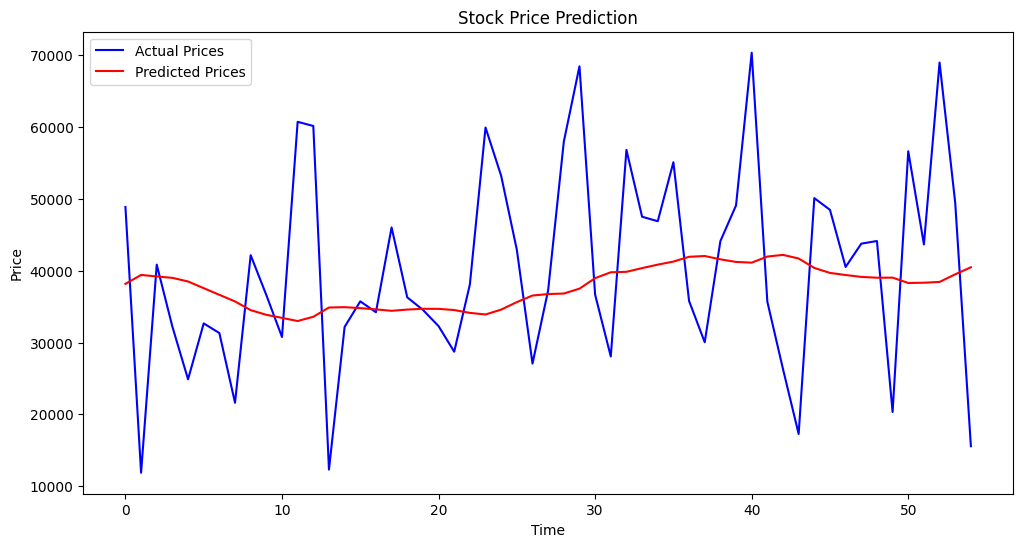

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [113]:
# Reshape the data for LSTM
#X = X.reshape(X.shape[0], X.shape[1], 1)

In [114]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0548
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0198
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0206
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0147
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0158
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154


In [115]:
# Predict future sales
predicted_sales = model.predict(X)
predicted_sales = scaler.inverse_transform(predicted_sales)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [116]:
predicted_sales

array([[24547.611],
       [24434.578],
       [24192.87 ],
       [23755.547],
       [23394.506],
       [22953.416],
       [22632.479],
       [22157.064],
       [21738.035],
       [21518.227],
       [21325.375],
       [21164.96 ],
       [20960.545],
       [20489.799],
       [20076.568],
       [20029.945],
       [19995.164],
       [20052.576],
       [20098.78 ],
       [19795.172],
       [19710.94 ],
       [19543.479],
       [19243.598],
       [18902.924],
       [18656.826],
       [18218.045],
       [18063.451],
       [18380.074],
       [18879.059],
       [19273.553],
       [19430.398],
       [19420.135],
       [19762.318],
       [20301.82 ],
       [20692.627],
       [21056.076],
       [21214.377],
       [21110.5  ],
       [20914.79 ],
       [20848.113],
       [20791.41 ],
       [21079.188],
       [21247.775],
       [21150.678],
       [21065.906],
       [21056.87 ],
       [21093.918],
       [21226.785],
       [21283.209],
       [20976.898],


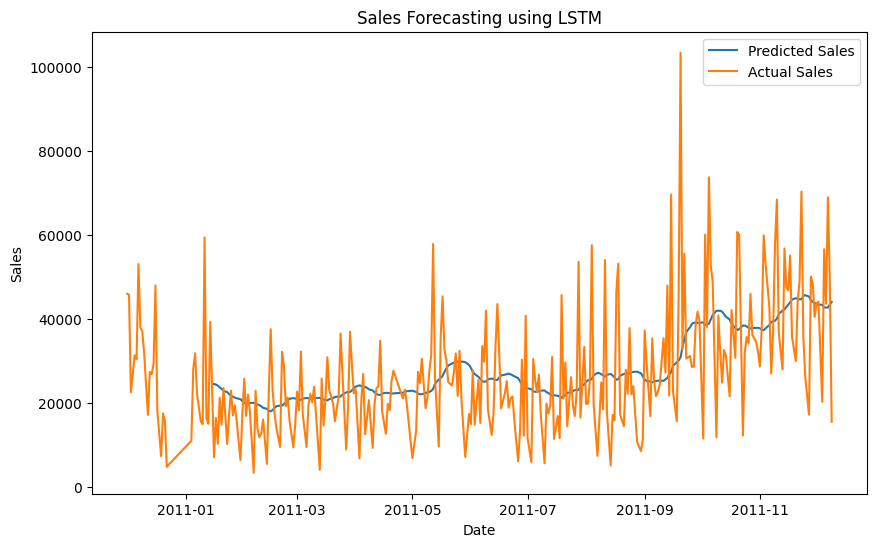

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Date'][-len(predicted_sales):], predicted_sales, label='Predicted Sales')
plt.plot(sales_data['Date'], sales_data['Total_sales'], label='Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting using LSTM')
plt.legend()
plt.show()